In [3]:
import rpy2.robjects as robjects
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from common_tools import r_import_tool as r_in
from common_tools import plotting_tools as ploto

Load the RData file with raw data, models and modeldata, and convert to pandas format

In [8]:
robjects.r['load']('./data/data_r_in_num.RData')

d_in = r_in.import_rdata('d_in',0,'surveydata')
d_in_s = r_in.import_rdata('d_in_s',0,'surveydata_standardised')

In [10]:
# Load models
robjects.r['load']('./data/modeldata_real_out.RData')

model_mrq1a = r_in.import_rdata('data_mrq1a',1,'mrq1a')
model_mrq1b = r_in.import_rdata('data_mrq1b',1,'mrq1b')
model_mrq1c = r_in.import_rdata('data_mrq1c',1,'mrq1c')


# Load model data
robjects.r['load']('./data/model_real_out.RData')

data_mrq1a = r_in.import_rdata('data_mrq1a',1,'mrq1a')
data_mrq1b = r_in.import_rdata('data_mrq1b',1,'mrq1b')
data_mrq1c = r_in.import_rdata('data_mrq1c',1,'mrq1c')

Make barplots and violinplots of the parameters

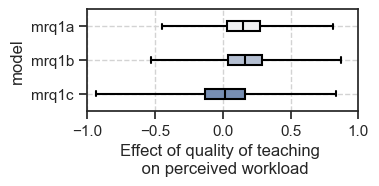

In [21]:
custom = {"grid.linestyle": "dashed", "grid.color": "lightgrey"}
sns.set_theme(style="ticks", rc = custom)
palette = sns.color_palette("mako")
      
# Create a dataframe with a_C values
data_b_t = pd.concat([model_mrq1a[['b_t','model']], 
                      model_mrq1b[['b_t','model']], 
                      model_mrq1c[['b_t','model']]],
                     ignore_index=True)

total_palette = sns.color_palette("light:b")
# Create a palette dictionary matching the model names in the data
palette = [total_palette[0], total_palette[2], total_palette[4]]

# Plot values
ploto.plot_pretty_boxplot(data_b_t, "b_t", "b_t_real", -1, 1, 'Effect of quality of teaching \n on perceived workload', palette)

